## Final Project Submission

Please fill out:
* Student name: Annbellah Nduta
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Asha Deen
* Blog post URL:


## Overview
 As a data scientist, I have been assigned with the task of assisting Microsoft in deciding which films to create. With me,I have movie datasets from Box Office Mojo, IMDb, Rotten Tomatoes, The Movie Database, and The Numbers that I will use to come up with insights ensuring success of Microsoft in the entertainment industry.

## Business Understanding


## Importing Libraries
First we start by importing the relevant libraries and modules that I will use for the project's data analysis.

In [2]:

import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import zipfile

## Data Understanding

In [3]:
with zipfile.ZipFile('zippedData/im.db.zip') as my_zip:
    zipfile.ZipFile.extractall(my_zip, path='ZippedData')

In [4]:
conn = sqlite3.connect('zippedData/im.db')
pd.read_sql("""
SELECT *
FROM sqlite_schema
WHERE type='table'
""", con)

NameError: name 'con' is not defined

# Lets First read data from each table

In [9]:
# movie_basics table
movie_basics = (""" 
SELECT *
FROM movie_basics
;""")
pd.read_sql(movie_basics,conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
# directors table
directors_table = ("""
SELECT *
FROM directors
;""")
pd.read_sql(directors_table,conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [ ]:
#known_for table 
known_for_table = ("""
SELECT *
FROM known_for
;""")
pd.read_sql(known_for_table,conn).head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [ ]:
#movie_akas table
movie_akas_table = ("""
SELECT *
FROM movie_akas
;""")
pd.read_sql(movie_akas_table,conn).head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [ ]:
#movie_ratings table
movie_ratings_table = ("""
SELECT *
FROM movie_ratings
;""")
pd.read_sql(movie_ratings_table,conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
#persons table 
persons_table = ("""
SELECT *
FROM persons
;""")
pd.read_sql(persons_table,conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [ ]:
#principals table 
principals_table = ("""
SELECT *
FROM principals
;""")
pd.read_sql(principals_table,conn).head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [ ]:
#writers table
writers_table = ("""
SELECT *
FROM writers
;""")
pd.read_sql(writers_table,conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


## Understanding the 'tn.movie_budgets.csv.gz'

In [42]:
movie_budgets_df = pd.read_csv('zippedData\\tn.movie_budgets.csv.gz')
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [43]:
#list of columns 
movie_budgets_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [44]:
#dataframe summary 
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Cleaning
I will be looking for gaps in the data set and making sure the data types are also in line with the respective columns.

In [45]:
# Number of null values in this dataframe
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no null values in the data set

In [46]:
#Column datatypes
movie_budgets_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

All columns in this dataset are string(str) datatype but the production_budget, domestic_gross and worldwide_gross need to be changed to integer (int) datatype.

In [47]:
#Removing the dollar sign from the production_budget, worldwide_gross, domestic_gross columns converts their datatypes to float
movie_budgets_df["production_budget"] = movie_budgets_df["production_budget"].replace("[$,]", "", regex=True).astype(float)
movie_budgets_df["worldwide_gross"] = movie_budgets_df["worldwide_gross"].replace("[$,]", "", regex=True).astype(float)
movie_budgets_df["domestic_gross"] = movie_budgets_df["domestic_gross"].replace("[$,]", "", regex=True).astype(float)
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


The values in the release_date column are float data type. We have to convert in order to use the data.

In [48]:
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB



## Data Analysis

Next I'm going to visualize the relationship between two variables: 'production_budget' and 'worldwide_gross' by a scatterplot.

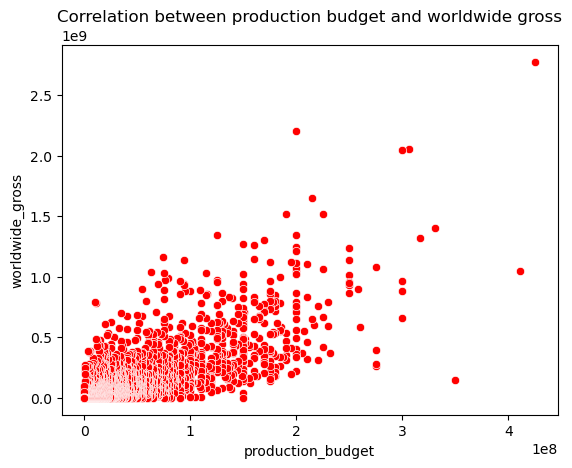

In [49]:
sns.scatterplot(x='production_budget', y='worldwide_gross', data=movie_budgets_df, color='red')
plt.title('Correlation between production budget and worldwide gross')
plt.savefig('scatterplot.png')  # Saving the plot as scatterplot.png
plt.show()

There is a positive relationship between production_budget and worldwide_gross.The positive relationship would imply that as the production budget of a movie increases, its worldwide gross also tends to increase. This suggests a potential correlation where higher investment in production often leads to higher returns in terms of gross revenue.

c:\Users\Bravado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


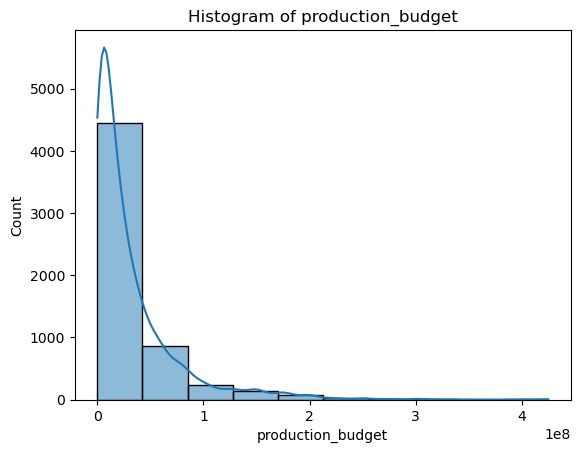

In [50]:
# Plot histogram with Seaborn
sns.histplot(movie_budgets_df['production_budget'], bins=10, kde=True)

# Set plot title and labels
plt.title('Histogram of production_budget')
plt.xlabel('production_budget')
plt.ylabel('Count')

plt.savefig('histogram.png') 

# Show the plot
plt.show()

The histogram plot visually illustrates how the count of movies is distributed across different production budgets, highlighting that more movies tend to have higher budgets.

I created new column for profit. Profit would be defined as (worldwide_gross - production_budget). Also the domestic_gross and worldwide_gross columns were not needed, so I dropped them

In [54]:
# created a profit column
movie_budgets_df['profit'] =(movie_budgets_df['worldwide_gross']) - (movie_budgets_df['production_budget'])
#dropped the domestic_gross and Worlwide_gross columns
movie_budgets_df.drop(columns=['domestic_gross', 'worldwide_gross'], inplace=True)
movie_budgets_df

,id,release_date,movie,production_budget,return_on_investment,profit
0,1,2009-12-18,Avatar,425000000.0,553.257713,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,154.667286,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,-57.210757,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,324.384139,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,315.369636,9.997217e+08
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,-100.000000,-7.000000e+03
5778,79,1999-04-02,Following,6000.0,3908.250000,2.344950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,-73.240000,-3.662000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,-100.000000,-1.400000e+03


I also wanted to the optimal production budget for a movie and identify the most financially successful movies. 

To address this, I included an additional column in the movie_budgets_df dataset that calculates the profit margin percentage using the formula (profit divided by adjusted production budget multiplied by 100).

In [55]:
# added new column for profit margin
movie_budgets_df['profit_margin(%)'] = movie_budgets_df['profit'] / movie_budgets_df['production_budget']*100

In [58]:
# A look at the dataframe having sorted the movies with the most profitable ones in descending order
movie_budgets_df.sort_values(by='profit', ascending=False).head()

,id,release_date,movie,production_budget,return_on_investment,profit,profit_margin(%)
0,1,2009-12-18,Avatar,425000000.0,553.257713,2.351345e+09,553.257713
42,43,1997-12-19,Titanic,200000000.0,1004.104198,2.008208e+09,1004.104198
6,7,2018-04-27,Avengers: Infinity War,300000000.0,582.711400,1.748134e+09,582.711400
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,571.016739,1.747311e+09,571.016739
33,34,2015-06-12,Jurassic World,215000000.0,666.909239,1.433855e+09,666.909239


From the data provided, it's evident that Avatar was the most financially successful film from 2000 to 2019.

In [61]:
# assigned this to a new variable
top50_profitable_movies = movie_budgets_df.sort_values(by='profit', ascending=False)[:10]
top50_profitable_movies

,id,release_date,movie,production_budget,return_on_investment,profit,profit_margin(%)
0,1,2009-12-18,Avatar,425000000.0,553.257713,2.351345e+09,553.257713
42,43,1997-12-19,Titanic,200000000.0,1004.104198,2.008208e+09,1004.104198
6,7,2018-04-27,Avengers: Infinity War,300000000.0,582.711400,1.748134e+09,582.711400
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,571.016739,1.747311e+09,571.016739
33,34,2015-06-12,Jurassic World,215000000.0,666.909239,1.433855e+09,666.909239
66,67,2015-04-03,Furious 7,190000000.0,699.327786,1.328723e+09,699.327786
26,27,2012-05-04,The Avengers,225000000.0,574.638176,1.292936e+09,574.638176
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000.0,973.354526,1.216693e+09,973.354526
41,42,2018-02-16,Black Panther,200000000.0,574.129112,1.148258e+09,574.129112
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000.0,668.101646,1.135773e+09,668.101646


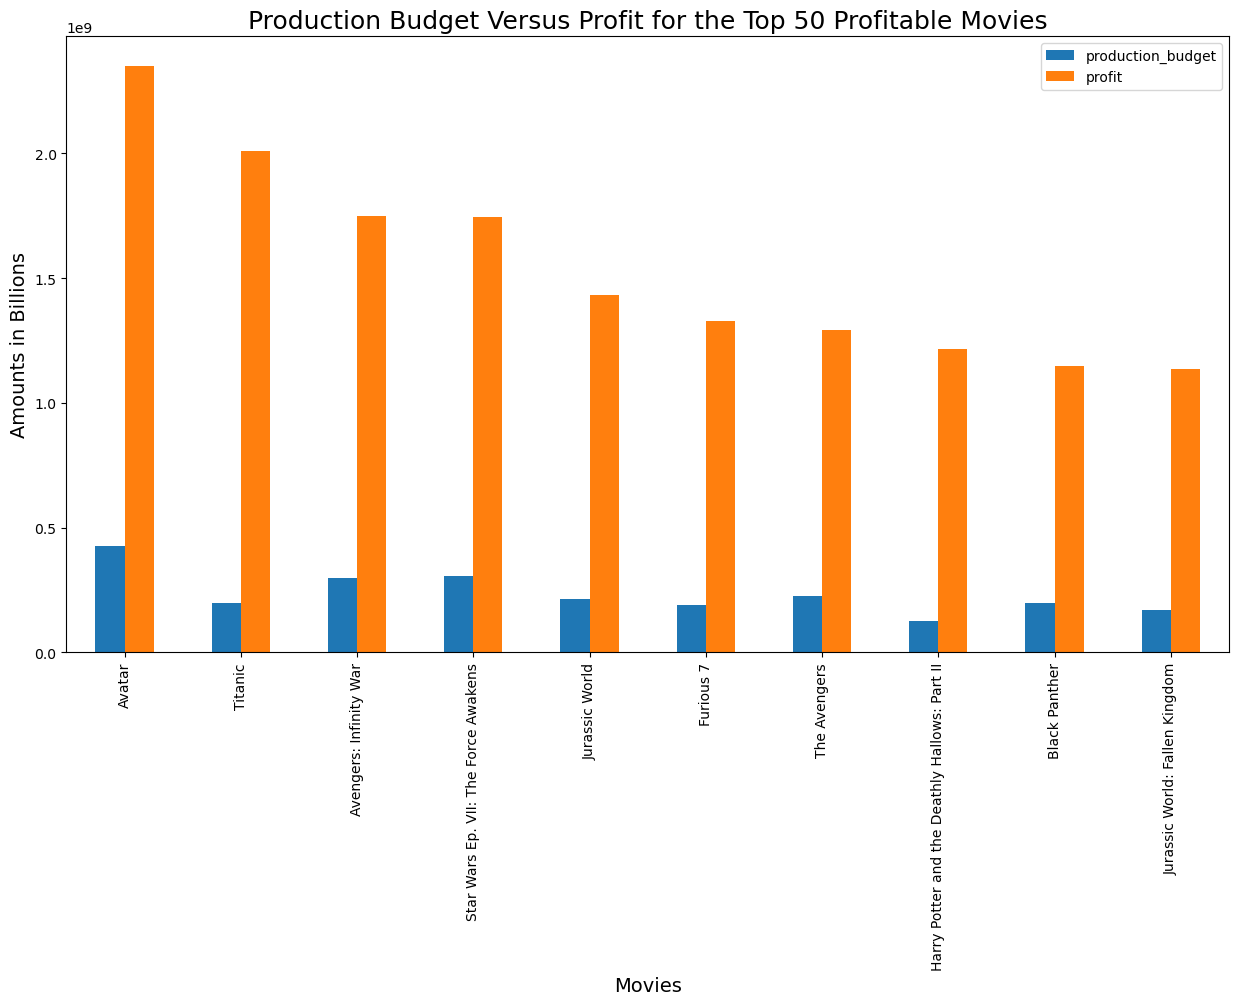

In [62]:
# barchart using matplotlib
top50_profitable_movies.plot.bar(x ='movie', y=['production_budget','profit'], figsize=(15,8));

# labeling the axis
plt.xlabel('Movies', fontsize =14)
plt.ylabel('Amounts in Billions', fontsize = 14)

# label the title
plt.title('Production Budget Versus Profit for the Top 50 Profitable Movies', fontsize=18)
plt.savefig('ProductionBudgetVersusProfitfortheTop50ProfitableMovies');

## IM.DB Analysis

In [63]:
# Most popular genres
q =("""
SELECT mb.genres, SUM(mr.numvotes) votes
FROM movie_basics mb
JOIN movie_ratings mr
ON mb.movie_id=mr.movie_id
GROUP BY 1
ORDER BY 2 DESC
;
""")
               
df1 = pd.read_sql(q, conn).head(20)
df1

,genres,votes
0,"Action,Adventure,Sci-Fi",23023248
1,"Action,Adventure,Fantasy",9658883
2,"Adventure,Animation,Comedy",8687435
3,Drama,8395521
4,"Comedy,Drama,Romance",7665463
5,"Action,Adventure,Comedy",7256686
6,Comedy,6832037
7,"Comedy,Drama",6462839
8,"Action,Crime,Drama",5563553
9,"Drama,Romance",5542760


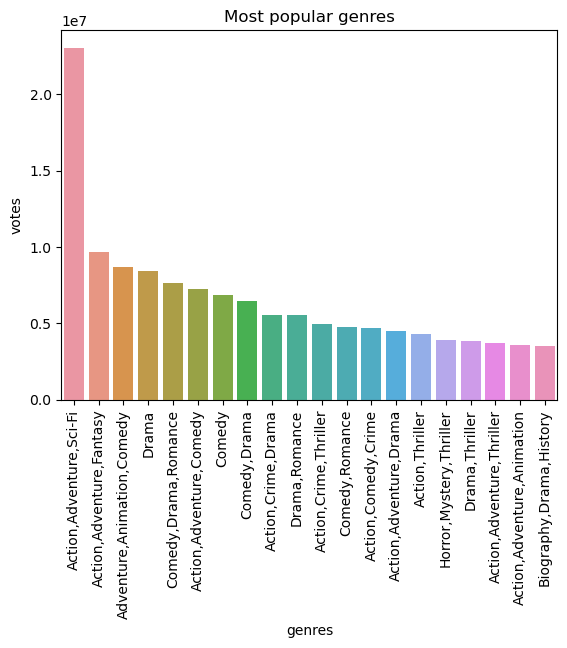

In [65]:
# Plot for most popular genres
sns.barplot(x = 'genres',
            y = 'votes',
            data = df1)
plt.xticks(rotation=90)
plt.title('Most popular genres')
plt.xlabel('genres')
plt.show()

A combination of Action, Adventure, and Sci-Fi genres enjoys notably higher popularity compared to other genres.

In [66]:
# Most popular directors
q =("""
SELECT ps.primary_name, SUM(mr.numvotes) votes
FROM movie_ratings mr
JOIN directors dr
ON dr.movie_id=mr.movie_id
JOIN persons ps
ON dr.person_id=ps.person_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 20
;
""")
               
df2 = pd.read_sql(q, conn)
df2

,primary_name,votes
0,James Gunn,18640459
1,Joe Russo,18421688
2,Anthony Russo,18421593
3,Zack Snyder,10576977
4,Christopher Nolan,10457390
5,Matthew Vaughn,9962120
6,Peter Jackson,8634677
7,Phil Lord,6565719
8,Christopher Miller,6565719
9,Kenneth Branagh,6454844


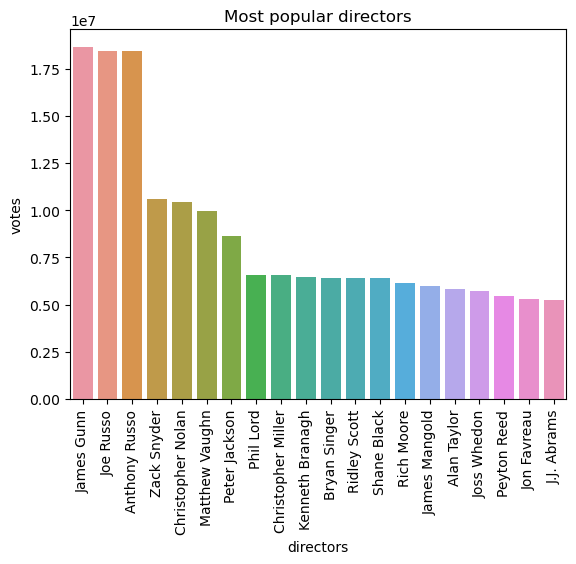

In [67]:
# let's find most popular directors
sns.barplot(x = 'primary_name',
            y = 'votes',
            data = df2)
plt.xticks(rotation=90)
plt.title('Most popular directors')
plt.xlabel('directors')
plt.show()

James Gunn, Joe Russo, and Anthony Russo, stand out prominently among other well-known directors.








In [68]:
# What is the relationship between runtime and popularity
q =("""
SELECT mb.runtime_minutes, mr.numvotes
FROM movie_ratings mr
JOIN movie_basics mb
ON mb.movie_id=mr.movie_id
;
""")
               
df3 = pd.read_sql(q, conn)
df3

,runtime_minutes,numvotes
0,117.0,31
1,87.0,559
2,90.0,20
3,99.0,50352
4,73.0,21
...,...,...
73851,84.0,25
73852,120.0,24
73853,NaN,14
73854,81.0,5


[Text(0.5, 1.0, 'correlation between runtime and popularity')]

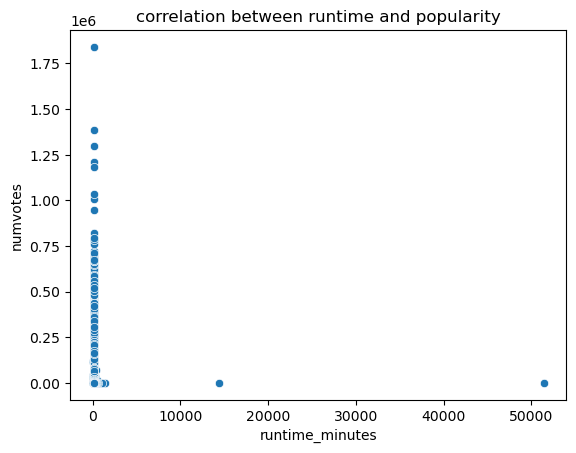

In [70]:
# what is the correlation between runtime and popularity
sns.scatterplot(x='runtime_minutes', y='numvotes', data=df3).set(title='correlation between runtime and popularity')

there is no correlation between runtime and popularity of movies

In [71]:
# What is the relationship between ratings and popularity
q =("""
SELECT mr.averagerating, mr.numvotes
FROM movie_ratings mr
;
""")
               
df4 = pd.read_sql(q, conn)
df4

,averagerating,numvotes
0,8.3,31
1,8.9,559
2,6.4,20
3,4.2,50352
4,6.5,21
...,...,...
73851,8.1,25
73852,7.5,24
73853,4.7,14
73854,7.0,5


[Text(0.5, 1.0, 'Correlation between ratings and popularity')]

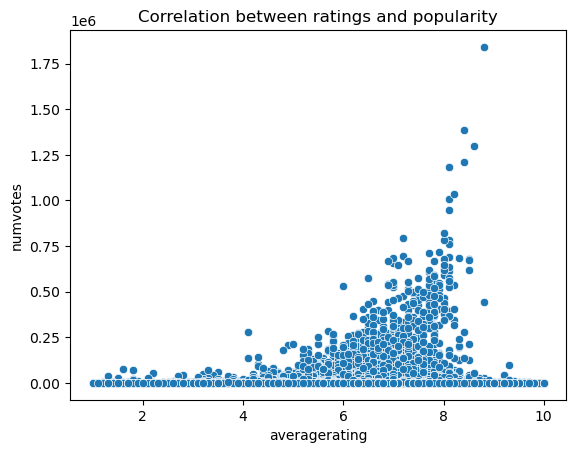

In [72]:
# what is the correlation between ratings and popularity
sns.scatterplot(x='averagerating', y='numvotes', data=df4).set(title='Correlation between ratings and popularity')

There is a positive relationship between movie ratings and popularity.

## Summary
In this project, I delved into movie industry data to understand the financial and popularity aspects of different genres. Utilizing Python along with pandas, matplotlib, and Seaborn, I conducted thorough data analysis.

The journey began with data exploration and cleaning to ensure data usability. Descriptive analysis followed, including visualizations to grasp distributions and correlations among variables.

My findings highlighted Action as the most profitable genre, with Drama and Comedy following closely. However, in terms of popularity, Comedy emerged as the top genre, trailed by Action and Drama.

Moreover, I uncovered a positive relationship between movie budgets and revenues, indicating that higher-budget films generally earned more. Interestingly, movie runtime showed minimal influence on revenue.